Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - MAE: 0.4506 - MSE: 0.2403 - loss: 0.1539 - val_MAE: 0.3484 - val_MSE: 0.1488 - val_loss: 0.0584
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.3026 - MSE: 0.1296 - loss: 0.0598 - val_MAE: 0.2476 - val_MSE: 0.0968 - val_loss: 0.0344
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 0.2720 - MSE: 0.1209 - loss: 0.0531 - val_MAE: 0.2939 - val_MSE: 0.1192 - val_loss: 0.0397
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 0.2608 - MSE: 0.0986 - loss: 0.0292 - val_MAE: 0.2901 - val_MSE: 0.1198 - val_loss: 0.0438
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.2504 - MSE: 0.0924 - loss: 0.0272 - val_MAE: 0.2526 - val_MSE: 0.1024 - val_loss: 0.0335
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - MAE: 0.1825 - MSE: 0.0558 - loss: 0.0138 - val_MAE: 0.2282 - val_MSE: 0.0923 - val_loss: 0.0306
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 0.1716 - MSE: 0.0640 - loss: 0.0261 - val_MAE: 0.2426 -

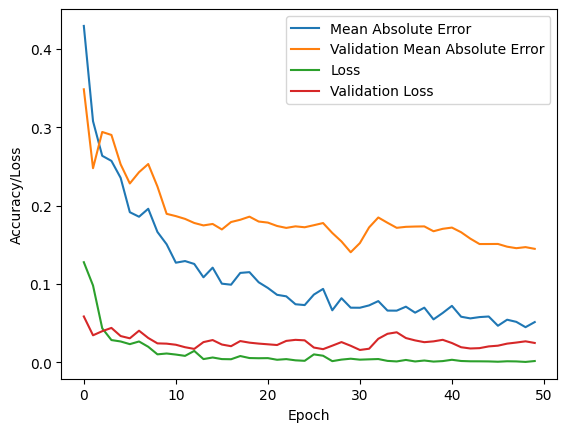

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


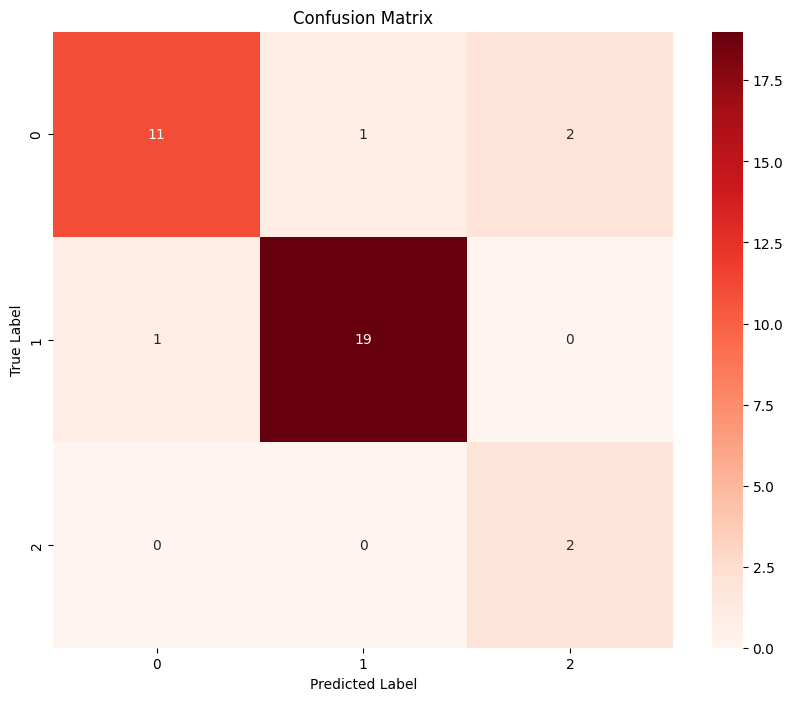

The Mean Absolute Error of this Model is 0.17
The accuracy of this model is 89.0%


In [31]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score

# Load the dataset
df = pd.read_csv('Virtual Patient Models_Dataset1.csv')

# Handle missing values (assuming empty values are represented as NaN)
df.fillna(df.mode().iloc[0], inplace=True)

# Extract features and target variable
features = ['part_id', 
             'gender', 
             'age', 
             'low_physical_activity', 
             'bmi_score',
             'cognitive_total_score', 
             'sleep', 
             'depression_total_score', 
             'living_alone', 
             'leisure_out', 
             'leisure_club',
             'social_visits', 
             'social_calls', 
             'social_phone', 
             'social_skype', 
             'social_text', 
             'activity_regular']

x = df[features]
y = df['depression_category']

# Convert string target variables to numerical categories using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode features variables
x = pd.get_dummies(x)

# Data preprocessing: scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Number of unique classes (depression categories)
num_classes = len(label_encoder.classes_)

# Convert the target variable to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

# Model Architecture
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(50, activation='relu',),
    Dropout(0.2), #dropout layer
    Dense(120, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.99), loss='categorical_focal_crossentropy', metrics=['MAE', 'MSE'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_split=0.2)

# Plot training history
plt.plot(history.history['MAE'], label='Mean Absolute Error')
plt.plot(history.history['val_MAE'], label='Validation Mean Absolute Error')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

score = mean_absolute_error(y_true_labels, y_pred_labels)
print("The Mean Absolute Error of this Model is {}".format(round(score, 2)))
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("The accuracy of this model is {}%".format(round(accuracy, 2)*100))
